In [9]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('gds.csv')

In [11]:
data['date'] = pd.to_datetime(data['date'])

In [12]:
filtered_data = data.loc[(data['date'] >= '2020-01-01') & (data['date'] <= '2021-12-31')]

In [13]:
filtered_data.set_index('date', inplace=True)

In [14]:
monthly_data = filtered_data['number of applications'].resample('M').sum()

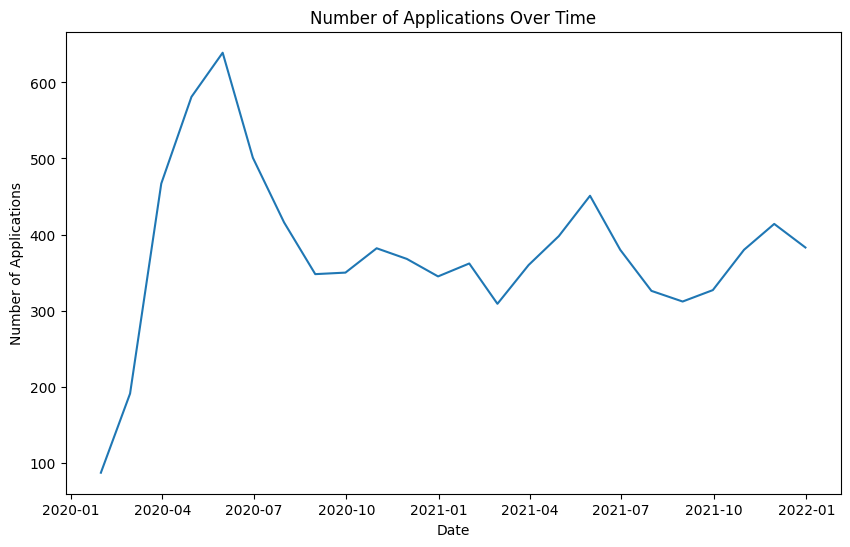

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data)
plt.title('Number of Applications Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Applications')
plt.show()

In [16]:
from pmdarima.arima import auto_arima

In [17]:
model = auto_arima(monthly_data, trace=True, error_action='ignore', suppress_warnings=True)
best_order = model.order

print("Best order:", best_order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=267.095, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=296.721, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=284.895, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=283.131, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=356.882, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=269.816, Time=0.31 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=268.803, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=279.677, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=270.476, Time=0.48 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.50 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 4.50

In [25]:
model = ARIMA(monthly_data, order=(2, 0, 2))
model_fit = model.fit()

C:\Users\Doffy\Documents\GitHub\Monster-Gym\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
forecast = model_fit.forecast(steps=12)

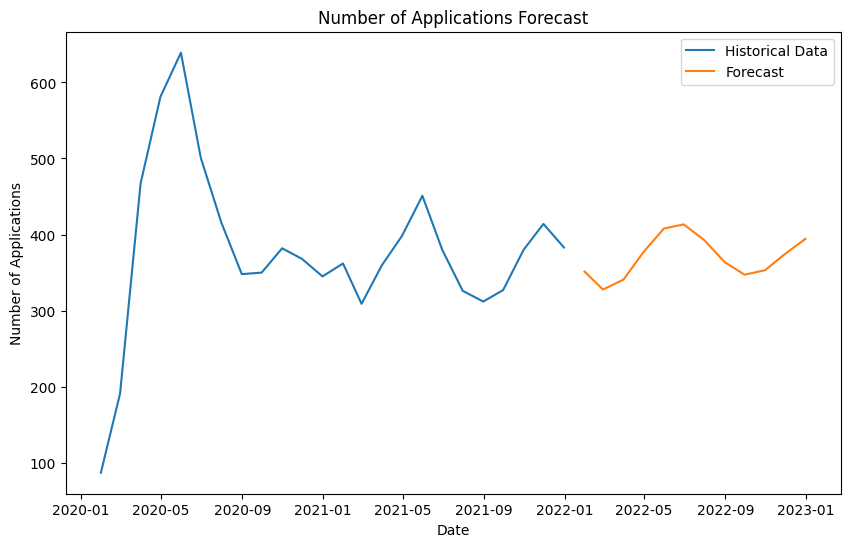

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Historical Data')
plt.plot(forecast, label='Forecast')
plt.title('Number of Applications Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Applications')
plt.legend()
plt.show()